In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
import re
import string

## These libraries help:

Read and manipulate data (pandas, numpy)

Clean and process text (re, string)

Visualize results (seaborn, matplotlib)

Build and evaluate machine learning models (sklearn)

In [10]:
# Load datasets
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [11]:
# Label the data: 1 for fake, 0 for true
fake["label"] = 1
true["label"] = 0


### We load two datasets:

Fake.csv contains fake news articles.

True.csv contains real news.

### We add a new column label:

1 = Fake news

0 = Real news

In [12]:
# Combine the datasets
data = pd.concat([fake, true], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

### We:

Merge both datasets.

Shuffle the rows randomly.

Remove any missing values.

In [13]:
# Optional: drop nulls if any
data.dropna(inplace=True)

In [14]:
# Combine title and text for better context
data["content"] = data["title"] + " " + data["text"]


### We combine the title and text into a new column called content for better context.

In [15]:
# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

data['content'] = data['content'].apply(clean_text)

### This function:

Removes punctuation, numbers, links, brackets, and special characters.

Makes all text lowercase.

Returns clean and readable text for modeling.



In [16]:
# Split into features and target
X = data['content']
y = data['label']


X: Input text data

y: Output labels (0 = real, 1 = fake)

In [17]:
# TF-IDF Vectorizer (imported within scope for use)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = tfidf.fit_transform(X)

Converts text into numeric values based on word importance (TF-IDF).

Removes stopwords (like "the", "is").

Ignores words that appear in more than 70% of articles (max_df=0.7).

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)


### Splits data into training (75%) and testing (25%) parts.

In [19]:
# Use a simple model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

### We use Logistic Regression, a simple and effective binary classification model.

In [20]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9828062360801781
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5362
           1       0.98      0.98      0.98      5863

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



- Predicts labels on test data.

- Calculates accuracy and shows precision, recall, and F1-score.

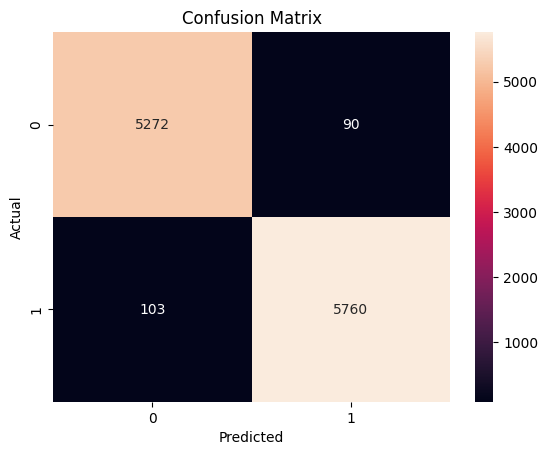

In [21]:
# Optional heatmap
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Shows how many real/fake articles were predicted correctly or incorrectly.



In [25]:
# Function to clean, transform, and predict new news content
def predict_news(news_text):
    clean = clean_text(news_text)
    vector = tfidf.transform([clean])
    result = model.predict(vector)
    return "Fake News" if result[0] == 1 else "Real News"

# Your sample news article
news_input = """

The prevalence of fake news has increased with the recent rise of social media,[7] especially the Facebook News Feed, and this misinformation is gradually seeping into the mainstream media.[8] Several factors have been implicated in the spread of fake news, such as political polarization, post-truth politics, motivated reasoning, confirmation bias, and social media algorithms.[1][9][10][11][12]

Fake news can reduce the impact of real news by competing with it. For example, a BuzzFeed News analysis found that the top fake news stories about the 2016 U.S. presidential election received more engagement on Facebook than top stories from major media outlets.[13] It also particularly has the potential to undermine trust in serious media coverage. The term has at times been used to cast doubt upon credible news, and U.S. president Donald Trump has been credited with popularizing the term by using it to describe any negative press coverage of himself. It has been increasingly criticized, due in part to Trump's misuse, with the British government deciding to avoid the term, as it is "poorly defined" and "conflates a variety of false information, from genuine error through to foreign interference".[14]

Multiple strategies for fighting fake news are actively researched, for various types of fake news. Politicians in certain autocratic and democratic countries have demanded effective self-regulation and legally enforced regulation in varying forms, of social media and web search engines.

"""

# Check the result
print("Prediction:", predict_news(news_input))


Prediction: Fake News


## You can check any custom news by:

Cleaning it

Transforming to TF-IDF

Predicting with the model

# ✅ Summary:
This project:

Reads and cleans real vs fake news articles.

Converts text to numeric format.

Trains a model to classify news.

Predicts whether new input is real or fake.

Gives accurate and explainable results.